In [1]:
import os
import sys
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore") # warningを無視
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 5000)
pd.options.display.float_format = '{:.3f}'.format

sys.path.append('../../../_base_script')
sys.path.append('../../../_utils')

import show_values_from_table as svft
import category_encoders as ce

# 外部モジュールを自動的にリロードする
%load_ext autoreload
%autoreload 2

/Users/takapy/.pyenv/versions/3.7.2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [2]:
file_path = '../data/raw/'
FEATURE_DIR_NAME = '../data/features/'

In [3]:
os.listdir(file_path)

['train.pkl',
 '.DS_Store',
 'fitting.csv',
 'test.csv',
 'spectrum.pkl',
 'test.pkl',
 'fitting_BK.csv',
 'train.csv',
 'train_pseudo3.pkl',
 'train_pseudo2.pkl',
 'train_pseudo.pkl',
 'spectrum_raw.zip',
 'sample_submission.csv',
 'spectrum_raw']

In [174]:
train = pd.read_pickle(file_path + 'train.pkl')
test =  pd.read_pickle(file_path + 'test.pkl')
spectrum = pd.read_pickle(file_path + 'spectrum.pkl')

In [175]:
display(
    train.head(), train.shape,
    test.head(), test.shape,
    spectrum.head(), spectrum.shape
)

spectrum_id         spectrum_filename               chip_id  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   

   exc_wl  layout_a  layout_x  layout_y    pos_x  target  params0   params1  \
0     850         2        36       140 1313.081       0   30.809   581.180   
1     780         3         0       168  159.415       0   91.301 17405.820   
2     780         1        34        29 -610.769       0  106.643     0.000   
3     780         2        32       139 1214.618       0  306.934 10994.865   
4     780         0        45        85 -257.616       0   46.133 22276.219   

   params2  params3   params4  params5  params6    rms  beta  
0 1037.715    1.531 22469.652 1032.317    8.296 10.029 0.025  
1 1080.510    4.766 33257.123 1077.469    8.018  7.948 0.344  
2 1119.464    2.000 42579.868 1378.883   11.687 10.740 0.000  
3 1139.855    5.199 39349.742 1145.213    9.445 10.380 0.218  
4 1120.918    5.668 31054.929 1117.108    7.659  8.317 0.418

(7436, 18)

spectrum_id         spectrum_filename               chip_id  \
0  000c50e603636dee33c7  fe0fb0a5d966d574c98b.dat  a948b8cdcd7957eb5c31   
1  000cba4c60cc418502e8  f1a2e526d2fbeadf20ca.dat  3c2948d0a755e5ff99f6   
2  0016566cc4324433f909  a9c9daa6e724bda94190.dat  3c2948d0a755e5ff99f6   
3  001d350c22eb0a7bb876  02559998e0cd35810729.dat  3c2948d0a755e5ff99f6   
4  002b39505ff347dca818  fe70889bcb853adf1d05.dat  3c2948d0a755e5ff99f6   

   exc_wl  layout_a  layout_x  layout_y    pos_x   params0   params1  params2  \
0     780         3         0       184  189.656    -0.200 26861.148 1377.633   
1     780         1        45       188 -256.473   308.515 26886.386 1277.465   
2     850         1        44       135 -291.337    48.078 18270.435 1497.343   
3     850         1        26       141 -863.927   179.053  7646.843 1498.852   
4     780         3        18        64  737.277 -7414.835 77855.568 1172.532   

   params3      params4  params5   params6    rms  beta  
0   12.273        0.000 1000.000 44730.274  7.982 1.000  
1    9.919        0.000 1001.383 26753.814 26.111 1.000  
2   10.583    10373.602 1490.661    11.664  9.727 0.638  
3    5.851    18995.697 1491.205    13.617 10.318 0.287  
4   10.794 28270817.417 1179.643  2400.602  9.761 0.003

(6952, 17)

wavelength  intensity         spectrum_filename
0    1032.836     87.000  b63e0413b6a42cfadca5.dat
1    1033.886    250.000  b63e0413b6a42cfadca5.dat
2    1034.936    293.000  b63e0413b6a42cfadca5.dat
3    1035.986    117.000  b63e0413b6a42cfadca5.dat
4    1037.036    208.000  b63e0413b6a42cfadca5.dat

(7362759, 3)

In [6]:
train.groupby(['chip_id', 'exc_wl', 'target']).size().reset_index()

chip_id  exc_wl  target     0
0   0b9dbf13f938efd5717f     780       0   378
1   0b9dbf13f938efd5717f     780       1     9
2   0b9dbf13f938efd5717f     850       0   612
3   0b9dbf13f938efd5717f     850       1     9
4   118c70535bd753a86615     780       0   799
5   118c70535bd753a86615     780       1    27
6   118c70535bd753a86615     850       0   937
7   118c70535bd753a86615     850       1    42
8   6718e7f83c824b1e436d     780       0   575
9   6718e7f83c824b1e436d     780       1     4
10  6718e7f83c824b1e436d     850       0   561
11  6718e7f83c824b1e436d     850       1     8
12  79ad4647da6de6425abf     780       0   841
13  79ad4647da6de6425abf     780       1    67
14  79ad4647da6de6425abf     850       0   858
15  79ad4647da6de6425abf     850       1    55
16  84b788fdc5e779f8a0df     850       0  1180
17  84b788fdc5e779f8a0df     850       1    14
18  c695a1e61e002b34e556     780       0   459
19  c695a1e61e002b34e556     780       1     1

In [7]:
_train = train.drop('target', axis=1)

In [8]:
# 結合
df = pd.concat([_train, test], axis=0, sort=False).reset_index(drop=True)

# カテゴリ変換
# df = category_encode(df)

In [158]:
display(df.head(), df.tail(), df.shape)

spectrum_id         spectrum_filename               chip_id  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   

   exc_wl  layout_a  layout_x  layout_y    pos_x  params0   params1  params2  \
0     850         2        36       140 1313.081   30.809   581.180 1037.715   
1     780         3         0       168  159.415   91.301 17405.820 1080.510   
2     780         1        34        29 -610.769  106.643     0.000 1119.464   
3     780         2        32       139 1214.618  306.934 10994.865 1139.855   
4     780         0        45        85 -257.616   46.133 22276.219 1120.918   

   params3   params4  params5  params6    rms  beta  
0    1.531 22469.652 1032.317    8.296 10.029 0.025  
1    4.766 33257.123 1077.469    8.018  7.948 0.344  
2    2.000 42579.868 1378.883   11.687 10.740 0.000  
3    5.199 39349.742 1145.213    9.445 10.380 0.218  
4    5.668 31054.929 1117.108    7.659  8.317 0.418

spectrum_id         spectrum_filename               chip_id  \
14383  ffe3f18bccea9eca0c4b  a9309e1b871e8089dedb.dat  3c2948d0a755e5ff99f6   
14384  ffe5dc9b0008f1686fbb  01d6b771f9b18d2c8be5.dat  a005efe42b620a737e7e   
14385  ffe99ef3b8a4ffb5cbfd  6dc212d4616d7e28ac68.dat  3c2948d0a755e5ff99f6   
14386  fff6557194ea0487af92  73db945d1ec8d0d97b51.dat  a005efe42b620a737e7e   
14387  ffffb084eeba6fd04e59  d147cb4379e428a08ebf.dat  3c2948d0a755e5ff99f6   

       exc_wl  layout_a  layout_x  layout_y     pos_x  params0  params1  \
14383     850         3         2       114   220.997  150.351 1575.744   
14384     780         3        16       181   702.840  285.045 5157.488   
14385     780         1        25        39  -897.361  201.595 1298.787   
14386     780         0         3        95 -1599.428  986.416 1536.974   
14387     850         3        28        10  1057.128   48.644  446.158   

       params2  params3   params4  params5  params6    rms  beta  
14383 1087.530    0.500 11981.832 1085.864    5.740  9.893 0.116  
14384 1153.698    4.534 16558.325 1149.558    6.347 19.913 0.237  
14385 1137.038    4.398 48307.446 1162.600   10.305  8.347 0.026  
14386 1155.252    2.438 14780.391 1154.479   17.361  9.972 0.094  
14387 1552.515    0.500 54420.981 1559.177   14.478  9.881 0.008

(14388, 17)

## cavityのpeak位置（param2）周辺にのみ着目して、Spectrum Dataから特徴量を作成する

In [159]:
_temp = pd.merge(spectrum, df[['spectrum_filename', 'params0', 'params1', 'params2', 'params3', 'params4', 'params5', 'params6']], on='spectrum_filename', how='left')

In [160]:
display(_temp.head(), _temp.tail(), _temp.shape)

wavelength  intensity         spectrum_filename  params0    params1  \
0    1032.836     87.000  b63e0413b6a42cfadca5.dat  422.054 157997.018   
1    1033.886    250.000  b63e0413b6a42cfadca5.dat  422.054 157997.018   
2    1034.936    293.000  b63e0413b6a42cfadca5.dat  422.054 157997.018   
3    1035.986    117.000  b63e0413b6a42cfadca5.dat  422.054 157997.018   
4    1037.036    208.000  b63e0413b6a42cfadca5.dat  422.054 157997.018   

   params2  params3   params4  params5  params6  
0 1223.287   10.212 72660.884 1284.380   10.388  
1 1223.287   10.212 72660.884 1284.380   10.388  
2 1223.287   10.212 72660.884 1284.380   10.388  
3 1223.287   10.212 72660.884 1284.380   10.388  
4 1223.287   10.212 72660.884 1284.380   10.388

wavelength  intensity         spectrum_filename  params0  params1  \
7362754    1560.748     13.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362755    1561.781     74.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362756    1562.813     10.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362757    1563.845     53.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362758    1564.877   -123.000  6b68aab0d74da96e9017.dat   43.486 6733.505   

         params2  params3   params4  params5  params6  
7362754 1140.110    5.131 22015.190 1135.923    8.213  
7362755 1140.110    5.131 22015.190 1135.923    8.213  
7362756 1140.110    5.131 22015.190 1135.923    8.213  
7362757 1140.110    5.131 22015.190 1135.923    8.213  
7362758 1140.110    5.131 22015.190 1135.923    8.213

(7362759, 10)

In [161]:
len(_temp['spectrum_filename'].unique().tolist())

14388

In [162]:
len(df['spectrum_filename'].unique().tolist())

14388

In [145]:
target_df = pd.DataFrame()
for filename in tqdm(_temp['spectrum_filename'].unique().tolist()):
    hoge = _temp.query('spectrum_filename == @filename')
    
    # レンジ
    range_upper = hoge.loc[:, 'params2'].values[0] + 10
    range_lower = hoge.loc[:, 'params2'].values[0] - 10
    hoge = hoge.query('wavelength <= @range_upper & wavelength >= @range_lower' )
    
    _df = hoge.groupby('spectrum_filename')['intensity']\
        .agg(['mean', 'std', 'median', 'skew'])\
        .rename(columns={'mean': 'cavity_mean', 'std': 'cavity_std',
                         'median': 'cavity_median', 'skew': 'cavity_skew'}).reset_index()
    _df['cavity_kurt'] = hoge['intensity'].kurt()
    
    target_df = target_df.append(_df)

100%|██████████| 14388/14388 [32:40<00:00,  7.34it/s]


In [163]:
display(target_df.head(), target_df.tail(), target_df.shape)

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  b63e0413b6a42cfadca5.dat     6127.579    2583.364       5977.000   
0  b983e6488058b0a7d4b2.dat      827.316     407.733        651.000   
0  d6b749749ec15ee0855d.dat      707.211     335.035        681.000   
0  18d60cd59c9edaa54aa6.dat     3313.100    1693.742       3354.000   
0  f64f189ab3b7be62d745.dat       83.053      62.313         76.000   

   cavity_skew  cavity_kurt  
0        0.060       -1.482  
0        1.193        0.371  
0        1.049        1.512  
0       -0.104       -1.792  
0        0.679        0.152

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  3d838b41f2c69d044bb8.dat     1151.895     510.300       1156.000   
0  27bd9e97f17d8d1ea225.dat       35.200     102.492         50.000   
0  80420815150351cbcd53.dat     1305.895     655.059       1293.000   
0  177c9c38f1a927057a3a.dat     1141.643     859.837        842.000   
0  6b68aab0d74da96e9017.dat     1122.579     643.395       1124.000   

   cavity_skew  cavity_kurt  
0       -0.154       -1.176  
0       -0.626       -0.393  
0        0.024       -1.061  
0        0.626       -1.242  
0       -0.078       -1.406

(13796, 6)

In [168]:
len(list(set(df['spectrum_filename'].unique().tolist()) - set(target_df['spectrum_filename'].unique().tolist())))

592

In [169]:
# target_df.to_pickle('spectrum_cavity.pkl')

In [170]:
cavity_df = pd.merge(df[['spectrum_filename']], target_df, on='spectrum_filename', how='left')

In [171]:
display(cavity_df.head(), cavity_df.tail(), cavity_df.shape)

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  b2e223339f4abce9b400.dat      657.548     543.945        458.000   
1  e2f150a503244145e7ce.dat     2059.421    1299.425       1769.000   
2  3d58b7ccaee157979cf0.dat       67.842      92.517         64.000   
3  ed3641184d3b7c0ae703.dat     2053.608     975.328       2332.000   
4  4c63418d39f86dfab9bb.dat     2119.053    1265.510       1754.000   

   cavity_skew  cavity_kurt  
0        0.779       -0.602  
1        0.388       -1.325  
2       -0.284        0.243  
3       -0.374       -1.457  
4        0.125       -1.421

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
14383  a9309e1b871e8089dedb.dat      676.650     482.546        542.500   
14384  01d6b771f9b18d2c8be5.dat     1160.053     600.932       1069.000   
14385  6dc212d4616d7e28ac68.dat      400.000     156.118        369.000   
14386  73db945d1ec8d0d97b51.dat     1469.632     206.169       1440.000   
14387  d147cb4379e428a08ebf.dat     1451.250     729.445       1475.000   

       cavity_skew  cavity_kurt  
14383        0.769       -0.204  
14384        0.069       -1.179  
14385        0.559        1.484  
14386        0.624       -0.332  
14387        0.047       -1.739

(14388, 6)

In [172]:
cavity_df.isnull().sum()

spectrum_filename      0
cavity_mean          592
cavity_std           599
cavity_median        592
cavity_skew          605
cavity_kurt          616
dtype: int64

In [173]:
cavity_df.to_pickle('cavity_df.pkl')

In [176]:
train = pd.merge(train, cavity_df, on='spectrum_filename', how='left')
test = pd.merge(test, cavity_df, on='spectrum_filename', how='left')

In [177]:
display(
    train.head(), train.shape,
    test.head(), test.shape
)

spectrum_id         spectrum_filename               chip_id  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   

   exc_wl  layout_a  layout_x  layout_y    pos_x  target  params0   params1  \
0     850         2        36       140 1313.081       0   30.809   581.180   
1     780         3         0       168  159.415       0   91.301 17405.820   
2     780         1        34        29 -610.769       0  106.643     0.000   
3     780         2        32       139 1214.618       0  306.934 10994.865   
4     780         0        45        85 -257.616       0   46.133 22276.219   

   params2  params3   params4  params5  params6    rms  beta  cavity_mean  \
0 1037.715    1.531 22469.652 1032.317    8.296 10.029 0.025      657.548   
1 1080.510    4.766 33257.123 1077.469    8.018  7.948 0.344     2059.421   
2 1119.464    2.000 42579.868 1378.883   11.687 10.740 0.000       67.842   
3 1139.855    5.199 39349.742 1145.213    9.445 10.380 0.218     2053.608   
4 1120.918    5.668 31054.929 1117.108    7.659  8.317 0.418     2119.053   

   cavity_std  cavity_median  cavity_skew  cavity_kurt  
0     543.945        458.000        0.779       -0.602  
1    1299.425       1769.000        0.388       -1.325  
2      92.517         64.000       -0.284        0.243  
3     975.328       2332.000       -0.374       -1.457  
4    1265.510       1754.000        0.125       -1.421

(7436, 23)

spectrum_id         spectrum_filename               chip_id  \
0  000c50e603636dee33c7  fe0fb0a5d966d574c98b.dat  a948b8cdcd7957eb5c31   
1  000cba4c60cc418502e8  f1a2e526d2fbeadf20ca.dat  3c2948d0a755e5ff99f6   
2  0016566cc4324433f909  a9c9daa6e724bda94190.dat  3c2948d0a755e5ff99f6   
3  001d350c22eb0a7bb876  02559998e0cd35810729.dat  3c2948d0a755e5ff99f6   
4  002b39505ff347dca818  fe70889bcb853adf1d05.dat  3c2948d0a755e5ff99f6   

   exc_wl  layout_a  layout_x  layout_y    pos_x   params0   params1  params2  \
0     780         3         0       184  189.656    -0.200 26861.148 1377.633   
1     780         1        45       188 -256.473   308.515 26886.386 1277.465   
2     850         1        44       135 -291.337    48.078 18270.435 1497.343   
3     850         1        26       141 -863.927   179.053  7646.843 1498.852   
4     780         3        18        64  737.277 -7414.835 77855.568 1172.532   

   params3      params4  params5   params6    rms  beta  cavity_mean  \
0   12.273        0.000 1000.000 44730.274  7.982 1.000      890.579   
1    9.919        0.000 1001.383 26753.814 26.111 1.000     1318.123   
2   10.583    10373.602 1490.661    11.664  9.727 0.638      995.930   
3    5.851    18995.697 1491.205    13.617 10.318 0.287      937.750   
4   10.794 28270817.417 1179.643  2400.602  9.761 0.003     2789.421   

   cavity_std  cavity_median  cavity_skew  cavity_kurt  
0     343.205        916.000        0.150       -0.916  
1     432.142       1354.000        0.158       -1.407  
2     326.626       1027.000       -0.405       -0.543  
3     393.653       1058.000       -0.693       -0.742  
4    1212.504       2587.000        0.065       -1.493

(6952, 22)

In [126]:
target_df = pd.DataFrame()

In [127]:
target_df

Empty DataFrame
Columns: []
Index: []

In [164]:
hoge = _temp.query('spectrum_filename == "15eb7d2d023bd7824fb8.dat"')

In [165]:
hoge

wavelength  intensity         spectrum_filename  params0  params1  \
554713    1032.836    144.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
554714    1033.886   -116.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
554715    1034.936     25.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
554716    1035.986     83.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
554717    1037.036    215.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
...            ...        ...                       ...      ...      ...   
555220    1560.748     46.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
555221    1561.781     41.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
555222    1562.813     60.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
555223    1563.845   -176.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   
555224    1564.877    -20.000  15eb7d2d023bd7824fb8.dat   10.564    0.000   

        params2  params3    params4  params5  params6  
554713 1006.354    2.000 114276.729 1276.052   11.556  
554714 1006.354    2.000 114276.729 1276.052   11.556  
554715 1006.354    2.000 114276.729 1276.052   11.556  
554716 1006.354    2.000 114276.729 1276.052   11.556  
554717 1006.354    2.000 114276.729 1276.052   11.556  
...         ...      ...        ...      ...      ...  
555220 1006.354    2.000 114276.729 1276.052   11.556  
555221 1006.354    2.000 114276.729 1276.052   11.556  
555222 1006.354    2.000 114276.729 1276.052   11.556  
555223 1006.354    2.000 114276.729 1276.052   11.556  
555224 1006.354    2.000 114276.729 1276.052   11.556  

[512 rows x 10 columns]

In [166]:
range_upper = hoge.loc[:, 'params2'].values[0] + 10
range_lower = hoge.loc[:, 'params2'].values[0] - 10

In [167]:
range_upper, range_lower

(1016.353584348543, 996.353584348543)

In [156]:
hoge = hoge.query('wavelength <= @range_upper & wavelength >= @range_lower' )
hoge

Empty DataFrame
Columns: [wavelength, intensity, spectrum_filename, params0, params1, params2, params3, params4, params5, params6]
Index: []

In [132]:
# +-10の個数、平均、中央値、分散, Skewness, Kurtosis
_hoge = hoge.groupby('spectrum_filename')['intensity']\
        .agg(['mean', 'std', 'median', 'skew'])\
        .rename(columns={'mean': 'cavity_mean', 'std': 'cavity_std',
                         'median': 'cavity_median', 'skew': 'cavity_skew'}).reset_index()
_hoge['cavity_kurt'] = hoge['intensity'].kurt()

In [133]:
_hoge

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  b63e0413b6a42cfadca5.dat     6127.579    2583.364       5977.000   

   cavity_skew  cavity_kurt  
0        0.060       -1.482

In [134]:
target_df = target_df.append(_hoge)

In [135]:
target_df

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  b63e0413b6a42cfadca5.dat     6127.579    2583.364       5977.000   

   cavity_skew  cavity_kurt  
0        0.060       -1.482

In [136]:
hoge = _temp.query('spectrum_filename == "6b68aab0d74da96e9017.dat"')

In [137]:
range_upper = hoge.loc[:, 'params2'].values[0] + 10
range_lower = hoge.loc[:, 'params2'].values[0] - 10

In [138]:
range_upper, range_lower

(1150.1104860904284, 1130.1104860904284)

In [139]:
hoge = hoge.query('wavelength <= @range_upper & wavelength >= @range_lower' )
hoge

wavelength  intensity         spectrum_filename  params0  params1  \
7362340    1130.346    656.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362341    1131.393   1124.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362342    1132.440   1058.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362343    1133.487   1434.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362344    1134.533   1674.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362345    1135.580   1847.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362346    1136.627   2047.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362347    1137.673   1985.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362348    1138.720   1901.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362349    1139.767   1669.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362350    1140.813   1579.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362351    1141.860   1175.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362352    1142.906    914.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362353    1143.953    685.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362354    1144.999    464.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362355    1146.045    431.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362356    1147.092    117.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362357    1148.138    169.000  6b68aab0d74da96e9017.dat   43.486 6733.505   
7362358    1149.184    400.000  6b68aab0d74da96e9017.dat   43.486 6733.505   

         params2  params3   params4  params5  params6  
7362340 1140.110    5.131 22015.190 1135.923    8.213  
7362341 1140.110    5.131 22015.190 1135.923    8.213  
7362342 1140.110    5.131 22015.190 1135.923    8.213  
7362343 1140.110    5.131 22015.190 1135.923    8.213  
7362344 1140.110    5.131 22015.190 1135.923    8.213  
7362345 1140.110    5.131 22015.190 1135.923    8.213  
7362346 1140.110    5.131 22015.190 1135.923    8.213  
7362347 1140.110    5.131 22015.190 1135.923    8.213  
7362348 1140.110    5.131 22015.190 1135.923    8.213  
7362349 1140.110    5.131 22015.190 1135.923    8.213  
7362350 1140.110    5.131 22015.190 1135.923    8.213  
7362351 1140.110    5.131 22015.190 1135.923    8.213  
7362352 1140.110    5.131 22015.190 1135.923    8.213  
7362353 1140.110    5.131 22015.190 1135.923    8.213  
7362354 1140.110    5.131 22015.190 1135.923    8.213  
7362355 1140.110    5.131 22015.190 1135.923    8.213  
7362356 1140.110    5.131 22015.190 1135.923    8.213  
7362357 1140.110    5.131 22015.190 1135.923    8.213  
7362358 1140.110    5.131 22015.190 1135.923    8.213

In [140]:
# +-10の個数、平均、中央値、分散, Skewness, Kurtosis
_hoge = hoge.groupby('spectrum_filename')['intensity']\
        .agg(['mean', 'std', 'median', 'skew'])\
        .rename(columns={'mean': 'cavity_mean', 'std': 'cavity_std',
                         'median': 'cavity_median', 'skew': 'cavity_skew'}).reset_index()
_hoge['cavity_kurt'] = hoge['intensity'].kurt()

In [141]:
_hoge['cavity_kurt'] = hoge['intensity'].kurt()

In [142]:
_hoge

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  6b68aab0d74da96e9017.dat     1122.579     643.395       1124.000   

   cavity_skew  cavity_kurt  
0       -0.078       -1.406

In [143]:
target_df = target_df.append(_hoge)

In [144]:
target_df

spectrum_filename  cavity_mean  cavity_std  cavity_median  \
0  b63e0413b6a42cfadca5.dat     6127.579    2583.364       5977.000   
0  6b68aab0d74da96e9017.dat     1122.579     643.395       1124.000   

   cavity_skew  cavity_kurt  
0        0.060       -1.482  
0       -0.078       -1.406

In [6]:
import category_encoders as ce

In [9]:
categorical_col = [
        'chip_id',
        'exc_wl',
        'layout_a'
    ]
ce_oe = ce.OrdinalEncoder(cols=categorical_col, handle_unknown='impute')

In [10]:
df

spectrum_id         spectrum_filename               chip_id  \
0      000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1      000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2      0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3      00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4      003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   
...                     ...                       ...                   ...   
14383  ffe3f18bccea9eca0c4b  a9309e1b871e8089dedb.dat  3c2948d0a755e5ff99f6   
14384  ffe5dc9b0008f1686fbb  01d6b771f9b18d2c8be5.dat  a005efe42b620a737e7e   
14385  ffe99ef3b8a4ffb5cbfd  6dc212d4616d7e28ac68.dat  3c2948d0a755e5ff99f6   
14386  fff6557194ea0487af92  73db945d1ec8d0d97b51.dat  a005efe42b620a737e7e   
14387  ffffb084eeba6fd04e59  d147cb4379e428a08ebf.dat  3c2948d0a755e5ff99f6   

       exc_wl  layout_a  layout_x  layout_y     pos_x  params0   params1  \
0         850         2        36       140  1313.081   30.809   581.180   
1         780         3         0       168   159.415   91.301 17405.820   
2         780         1        34        29  -610.769  106.643     0.000   
3         780         2        32       139  1214.618  306.934 10994.865   
4         780         0        45        85  -257.616   46.133 22276.219   
...       ...       ...       ...       ...       ...      ...       ...   
14383     850         3         2       114   220.997  150.351  1575.744   
14384     780         3        16       181   702.840  285.045  5157.488   
14385     780         1        25        39  -897.361  201.595  1298.787   
14386     780         0         3        95 -1599.428  986.416  1536.974   
14387     850         3        28        10  1057.128   48.644   446.158   

       params2  params3   params4  params5  params6    rms  beta  
0     1037.715    1.531 22469.652 1032.317    8.296 10.029 0.025  
1     1080.510    4.766 33257.123 1077.469    8.018  7.948 0.344  
2     1119.464    2.000 42579.868 1378.883   11.687 10.740 0.000  
3     1139.855    5.199 39349.742 1145.213    9.445 10.380 0.218  
4     1120.918    5.668 31054.929 1117.108    7.659  8.317 0.418  
...        ...      ...       ...      ...      ...    ...   ...  
14383 1087.530    0.500 11981.832 1085.864    5.740  9.893 0.116  
14384 1153.698    4.534 16558.325 1149.558    6.347 19.913 0.237  
14385 1137.038    4.398 48307.446 1162.600   10.305  8.347 0.026  
14386 1155.252    2.438 14780.391 1154.479   17.361  9.972 0.094  
14387 1552.515    0.500 54420.981 1559.177   14.478  9.881 0.008  

[14388 rows x 17 columns]

In [11]:
# ce_oe.fit_transform(df[categorical_col])[['chip_id']]

In [12]:
chip_df = df[['chip_id']]

In [13]:
chip_df['chip_id_enc'] = ce_oe.fit_transform(df[categorical_col])[['chip_id']]

In [14]:
df[categorical_col] = ce_oe.fit_transform(df[categorical_col])

# df[['chip_id_enc', 'exc_wl_enc', 'layout_a_enc']] = ce_oe.fit_transform(df[categorical_col])
# df['chip_id_enc'] = ce_oe.fit_transform(df[categorical_col])[['chip_id']]

In [15]:
df

spectrum_id         spectrum_filename  chip_id  exc_wl  \
0      000da4633378740f1ee8  b2e223339f4abce9b400.dat        1       1   
1      000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat        1       2   
2      0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat        2       2   
3      00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat        2       2   
4      003483ee5ae313d37590  4c63418d39f86dfab9bb.dat        2       2   
...                     ...                       ...      ...     ...   
14383  ffe3f18bccea9eca0c4b  a9309e1b871e8089dedb.dat        8       1   
14384  ffe5dc9b0008f1686fbb  01d6b771f9b18d2c8be5.dat        9       2   
14385  ffe99ef3b8a4ffb5cbfd  6dc212d4616d7e28ac68.dat        8       2   
14386  fff6557194ea0487af92  73db945d1ec8d0d97b51.dat        9       2   
14387  ffffb084eeba6fd04e59  d147cb4379e428a08ebf.dat        8       1   

       layout_a  layout_x  layout_y     pos_x  params0   params1  params2  \
0             1        36       140  1313.081   30.809   581.180 1037.715   
1             2         0       168   159.415   91.301 17405.820 1080.510   
2             3        34        29  -610.769  106.643     0.000 1119.464   
3             1        32       139  1214.618  306.934 10994.865 1139.855   
4             4        45        85  -257.616   46.133 22276.219 1120.918   
...         ...       ...       ...       ...      ...       ...      ...   
14383         2         2       114   220.997  150.351  1575.744 1087.530   
14384         2        16       181   702.840  285.045  5157.488 1153.698   
14385         3        25        39  -897.361  201.595  1298.787 1137.038   
14386         4         3        95 -1599.428  986.416  1536.974 1155.252   
14387         2        28        10  1057.128   48.644   446.158 1552.515   

       params3   params4  params5  params6    rms  beta  
0        1.531 22469.652 1032.317    8.296 10.029 0.025  
1        4.766 33257.123 1077.469    8.018  7.948 0.344  
2        2.000 42579.868 1378.883   11.687 10.740 0.000  
3        5.199 39349.742 1145.213    9.445 10.380 0.218  
4        5.668 31054.929 1117.108    7.659  8.317 0.418  
...        ...       ...      ...      ...    ...   ...  
14383    0.500 11981.832 1085.864    5.740  9.893 0.116  
14384    4.534 16558.325 1149.558    6.347 19.913 0.237  
14385    4.398 48307.446 1162.600   10.305  8.347 0.026  
14386    2.438 14780.391 1154.479   17.361  9.972 0.094  
14387    0.500 54420.981 1559.177   14.478  9.881 0.008  

[14388 rows x 17 columns]

In [16]:
chip_df

chip_id  chip_id_enc
0      79ad4647da6de6425abf            1
1      79ad4647da6de6425abf            1
2      c695a1e61e002b34e556            2
3      c695a1e61e002b34e556            2
4      c695a1e61e002b34e556            2
...                     ...          ...
14383  3c2948d0a755e5ff99f6            8
14384  a005efe42b620a737e7e            9
14385  3c2948d0a755e5ff99f6            8
14386  a005efe42b620a737e7e            9
14387  3c2948d0a755e5ff99f6            8

[14388 rows x 2 columns]

In [19]:
sorted(chip_df['chip_id'].unique().tolist())

['0b9dbf13f938efd5717f',
 '118c70535bd753a86615',
 '3c2948d0a755e5ff99f6',
 '6718e7f83c824b1e436d',
 '79ad4647da6de6425abf',
 '84b788fdc5e779f8a0df',
 'a005efe42b620a737e7e',
 'a948b8cdcd7957eb5c31',
 'c695a1e61e002b34e556']

In [96]:
# 重複を除外
chip_df = chip_df[~chip_df.duplicated()].reset_index(drop=True)

In [109]:
chip_df

chip_id  chip_id_enc
0  79ad4647da6de6425abf            1
1  c695a1e61e002b34e556            2
2  6718e7f83c824b1e436d            3
3  0b9dbf13f938efd5717f            4
4  84b788fdc5e779f8a0df            5
5  118c70535bd753a86615            6
6  a948b8cdcd7957eb5c31            7
7  3c2948d0a755e5ff99f6            8
8  a005efe42b620a737e7e            9

In [110]:
# dic = chip_df.to_dict()
dic = dict(zip(chip_df['chip_id_enc'], chip_df['chip_id']))

In [114]:
# dic.to_pickle('chip_dict.pkl')
import pickle
with open('chip_dict.pkl', mode='wb') as f:
    pickle.dump(dic,f)

In [115]:
with open('chip_dict.pkl', 'rb') as f:
    chip_dict = pickle.load(f)

In [120]:
chip_dict

{1: '79ad4647da6de6425abf',
 2: 'c695a1e61e002b34e556',
 3: '6718e7f83c824b1e436d',
 4: '0b9dbf13f938efd5717f',
 5: '84b788fdc5e779f8a0df',
 6: '118c70535bd753a86615',
 7: 'a948b8cdcd7957eb5c31',
 8: '3c2948d0a755e5ff99f6',
 9: 'a005efe42b620a737e7e'}

In [121]:
chip_dict[3]

'6718e7f83c824b1e436d'

## スペクトルの特徴量生成

In [11]:
# spectrum_filename_list = spectrum['spectrum_filename'].unique().tolist()

In [54]:
temp = spectrum.reset_index().pivot(index='spectrum_filename', columns='index', values='intensity')

In [55]:
temp.head()

index                        0        1       2       3       4       5    \
spectrum_filename                                                           
0001d1a608ff9c3199f5.dat 272.000 -251.000 188.000 -96.000 229.000 205.000   
000bb292d2bd5f9b374d.dat 411.000  546.000 328.000 283.000 403.000 391.000   
000d15b8980f41dddd2d.dat  46.000  204.000 100.000 262.000 -48.000 176.000   
0012826a79bd771a316e.dat 256.000   97.000 168.000 174.000 183.000 129.000   
001a2aee5312761dc154.dat 329.000  184.000 371.000 377.000 187.000 196.000   

index                         6       7        8       9       10      11   \
spectrum_filename                                                            
0001d1a608ff9c3199f5.dat -118.000 -35.000 -166.000 212.000 174.000 174.000   
000bb292d2bd5f9b374d.dat  466.000 602.000  644.000 562.000 684.000 629.000   
000d15b8980f41dddd2d.dat   83.000 304.000  340.000 219.000  28.000  -5.000   
0012826a79bd771a316e.dat  -41.000 285.000  182.000 114.000 310.000 265.000   
001a2aee5312761dc154.dat  223.000 307.000  272.000 311.000 315.000 381.000   

index                        12      13      14      15      16       17   \
spectrum_filename                                                           
0001d1a608ff9c3199f5.dat 149.000 220.000  -9.000  49.000 193.000 -152.000   
000bb292d2bd5f9b374d.dat 661.000 644.000 739.000 805.000 885.000  788.000   
000d15b8980f41dddd2d.dat 105.000 162.000 252.000 105.000 101.000  187.000   
0012826a79bd771a316e.dat 143.000 305.000 148.000 137.000 407.000  304.000   
001a2aee5312761dc154.dat 182.000 235.000 363.000 166.000 626.000  321.000   

index                        18      19      20      21      22      23   \
spectrum_filename                                                          
0001d1a608ff9c3199f5.dat 188.000 270.000 290.000 -65.000  30.000 -45.000   
000bb292d2bd5f9b374d.dat 741.000 739.000 887.000 762.000 896.000 895.000   
000d15b8980f41dddd2d.dat 190.000 239.000 264.000  85.000 146.000 254.000   
0012826a79bd771a316e.dat 403.000 127.000 144.000 217.000 286.000 180.000   
001a2aee5312761dc154.dat 348.000 401.000 357.000 288.000 208.000 335.000   

index                        24      25      26      27      28       29   \
spectrum_filename                                                           
0001d1a608ff9c3199f5.dat   0.000  20.000 132.000 149.000  21.000  -65.000   
000bb292d2bd5f9b374d.dat 887.000 824.000 981.000 952.000 763.000 1062.000   
000d15b8980f41dddd2d.dat 219.000 141.000 299.000 167.000 483.000  204.000   
0012826a79bd771a316e.dat 173.000 413.000 162.000 140.000 114.000  216.000   
001a2aee5312761dc154.dat 243.000 303.000 289.000 380.000 363.000  264.000   

index                         30       31       32       33       34   \
spectrum_filename                                                       
0001d1a608ff9c3199f5.dat  113.000   35.000  148.000  208.000  262.000   
000bb292d2bd5f9b374d.dat 1154.000 1059.000 1051.000 1047.000 1163.000   
000d15b8980f41dddd2d.dat  307.000  165.000  209.000  128.000  132.000   
0012826a79bd771a316e.dat  302.000  351.000   97.000  144.000  272.000   
001a2aee5312761dc154.dat  353.000  277.000   95.000  291.000  154.000   

index                         35       36       37       38       39   \
spectrum_filename                                                       
0001d1a608ff9c3199f5.dat  317.000  132.000  166.000  347.000  300.000   
000bb292d2bd5f9b374d.dat 1204.000 1221.000 1383.000 1318.000 1385.000   
000d15b8980f41dddd2d.dat  147.000  238.000  309.000  219.000  291.000   
0012826a79bd771a316e.dat  255.000  353.000  331.000  331.000  312.000   
001a2aee5312761dc154.dat  320.000  272.000  136.000  218.000  318.000   

index                         40       41       42       43       44   \
spectrum_filename                                                       
0001d1a608ff9c3199f5.dat  272.000  228.000  404.000  390.000  376.000   
000bb292d2bd5f9b374d.dat 1346.000 1342.000 1417.000 1319.

In [78]:
temp.shape

(14388, 512)

In [79]:
temp = temp.fillna(0)

In [80]:
# 圧縮
import umap
import bhtsne

In [81]:
v_columns = [i for i in range(512)]

In [82]:
%%time
um = umap.UMAP()
_umap = um.fit_transform(temp[v_columns])

In [83]:
umap_df = pd.DataFrame(_umap, columns=['dc_umap1', 'dc_umap2'])
umap_df.shape

In [89]:
%%time
_bhtsne = bhtsne.tsne(temp[v_columns].astype(np.float64), dimensions=2, rand_seed=42)

CPU times: user 3min 37s, sys: 4.1 s, total: 3min 41s
Wall time: 3min 41s


In [90]:
bhtsne_df = pd.DataFrame(_bhtsne, columns=['dc_tsne1', 'dc_tsne2'])
bhtsne_df.shape

(14388, 2)

In [91]:
_temp = temp.reset_index()[['spectrum_filename']]

In [92]:
_temp.head()

index         spectrum_filename
0      0001d1a608ff9c3199f5.dat
1      000bb292d2bd5f9b374d.dat
2      000d15b8980f41dddd2d.dat
3      0012826a79bd771a316e.dat
4      001a2aee5312761dc154.dat

In [93]:
_df = pd.concat([_temp, umap_df, bhtsne_df], axis=1)

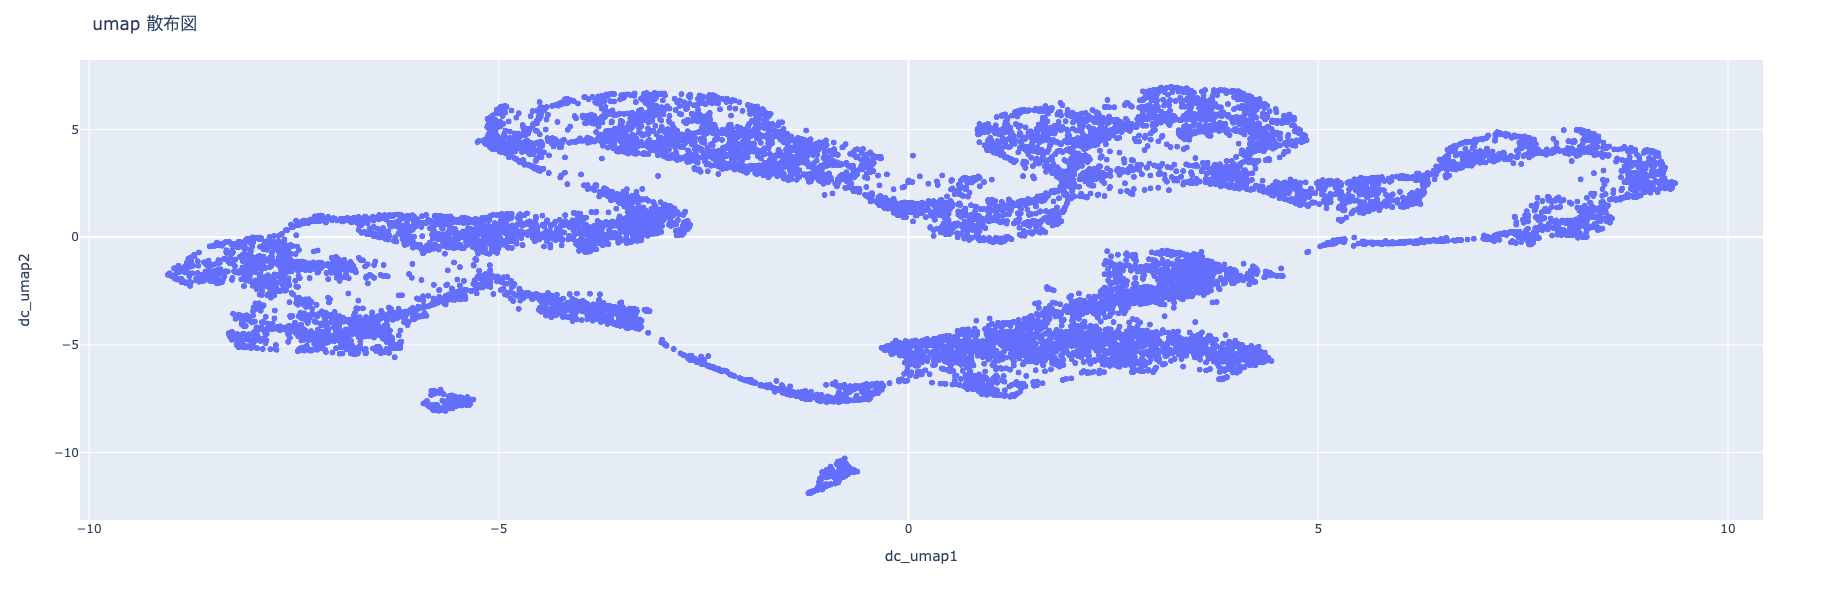

In [94]:
fig = px.scatter(_df, x=_df['dc_umap1'], y=_df['dc_umap2'])
fig.update_layout(
    title='umap 散布図',
    width=900,
    height=600,
    )
fig.show()

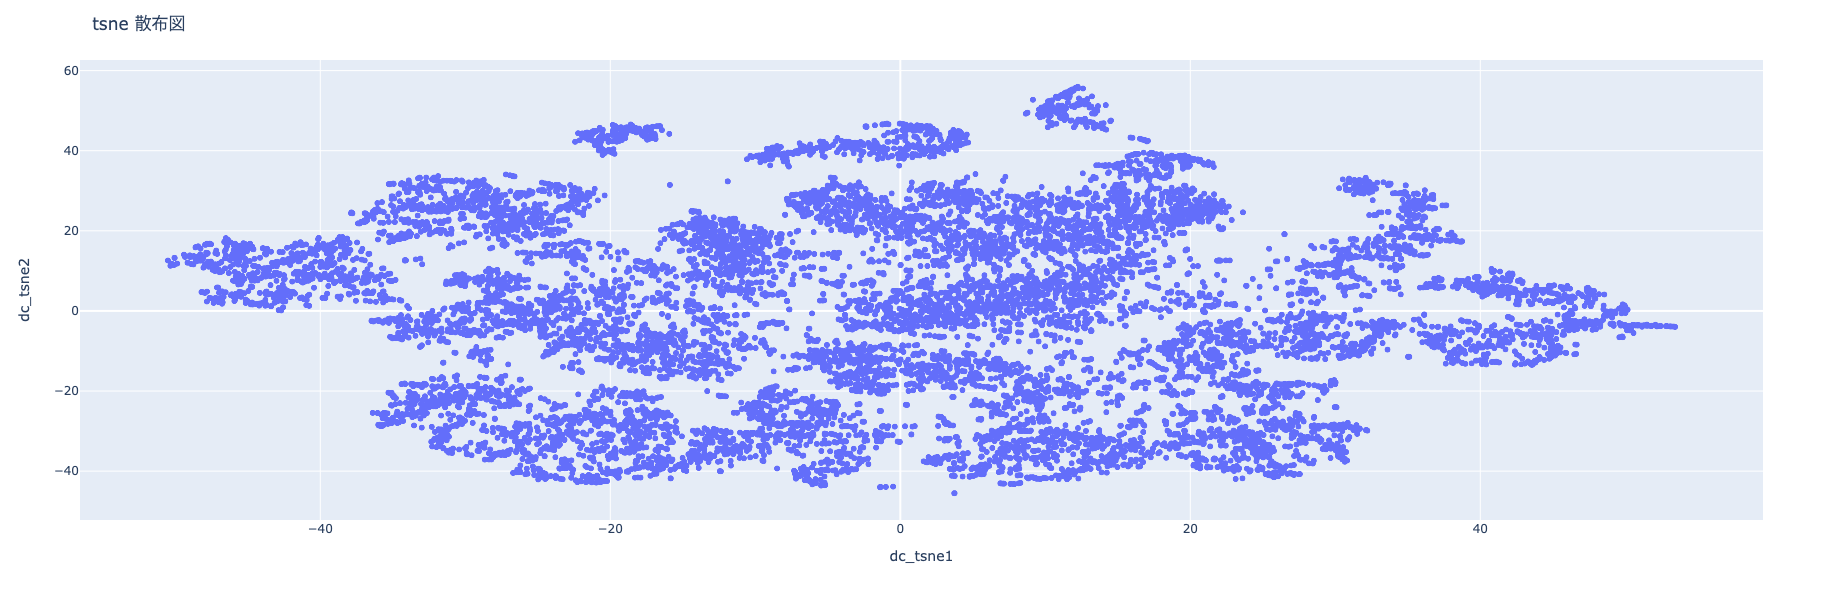

In [95]:
fig = px.scatter(_df, x=_df['dc_tsne1'], y=_df['dc_tsne2'])
fig.update_layout(
    title='tsne 散布図',
    width=900,
    height=600,
    )
fig.show()

In [96]:
_df.head()

spectrum_filename  dc_umap1  dc_umap2  dc_tsne1  dc_tsne2
0  0001d1a608ff9c3199f5.dat     1.906    -3.323    18.662     4.549
1  000bb292d2bd5f9b374d.dat    -2.310    -6.149    -8.458    40.503
2  000d15b8980f41dddd2d.dat    -8.097    -5.091   -32.057    33.046
3  0012826a79bd771a316e.dat     2.420    -4.547     9.262    14.243
4  001a2aee5312761dc154.dat     6.116     1.601    30.931   -10.046

In [97]:
_df.to_pickle(FEATURE_DIR_NAME + 'wave_umap_tsne.pkl')

In [99]:
def calculate_peak(df) -> pd.DataFrame:
    """値幅とピークを算出"""
    spectrum_filename_list = df['spectrum_filename'].unique().tolist()
    spectrum_dict = {}
    for file_name in tqdm(spectrum_filename_list):
        x = df.query('spectrum_filename == @file_name')['wavelength'].values
        y = df.query('spectrum_filename == @file_name')['intensity'].values
        # 100% 〜 10%まで5%刻みの値幅を計算
        temp_dict = {}
        for p in np.arange(1, 0.05, -0.05):
            spline = UnivariateSpline(x, y-np.max(y)*round(p, 2), s=0)
            roots = spline.roots()  # find the roots

            # 値幅
            fwhm = np.nan
            for i in range(len(roots)//2):
                temp_fwhm = roots[i*2+1] - roots[i*2]
                if i == 0:
                    fwhm = temp_fwhm
                else:
                    if fwhm > temp_fwhm:
                        fwhm = temp_fwhm
            # ピークの回数
            num_peak = len(roots)//2

            col_suffix = str(round(p, 2)).replace('.', '')
            temp_dict[f'fwhm_{col_suffix}'] = fwhm
            temp_dict[f'num_peak_{col_suffix}'] = num_peak

        spectrum_dict[file_name] = temp_dict
    temp_df = pd.DataFrame.from_dict(spectrum_dict, orient='index').reset_index().rename({'index': 'spectrum_filename'}, axis=1)

    col = [
        'spectrum_filename',
        'fwhm_10',
        'num_peak_10',
        'fwhm_095',
        'num_peak_095',
        'fwhm_09',
        'num_peak_09',
        'fwhm_085',
        'num_peak_085',
        'fwhm_08',
        'num_peak_08',
        'fwhm_075',
        'num_peak_075',
        'fwhm_07',
        'num_peak_07',
        'fwhm_065',
        'num_peak_065',
        'fwhm_06',
        'num_peak_06',
        'fwhm_055',
        'num_peak_055',
        'fwhm_05',
        'num_peak_05',
        'fwhm_045',
        'num_peak_045',
        'fwhm_04',
        'num_peak_04',
        'fwhm_035',
        'num_peak_035',
        'fwhm_03',
        'num_peak_03',
        'fwhm_025',
        'num_peak_025',
        'fwhm_02',
        'num_peak_02',
        'fwhm_015',
        'num_peak_015',
        'fwhm_01',
        'num_peak_01'
    ]
    temp_df[col].to_pickle(FEATURE_DIR_NAME + 'spectrum_peak_fwhm_df.pkl')
    return temp_df

def fe_spectrum(df, calculate_peak=False) -> pd.DataFrame:
    """スペクトルの特徴量生成処理"""

    # 光の強度の集計統計量
    _df = df.groupby('spectrum_filename')['intensity'].agg(['max', 'min', 'mean', 'std', 'sum', 'median'])\
                                                      .rename(columns={'max': 'intensity_max', 'min': 'intensity_min',
                                                              'mean': 'intensity_mean', 'std': 'intensity_std',
                                                              'sum': 'intensity_sum', 'median': 'intensity_median'})

    # 縦の振幅の大きさ
    _df['intensity_amplitude_v'] = _df['intensity_max'] - _df['intensity_min']

    # 右の裾が長い分布を対数変換する
    # intensity_max, intensity_mean, intensity_std, intensity_sum, intensity_amplitude_v
    _df['intensity_max_log1p'] = np.log1p(_df['intensity_max'])
    _df['intensity_mean_log1p'] = np.log1p(_df['intensity_mean'])
    _df['intensity_std_log1p'] = np.log1p(_df['intensity_std'])
    _df['intensity_sum_log1p'] = np.log1p(_df['intensity_sum'])
    _df['intensity_median_log1p'] = np.log1p(_df['intensity_median'])
    _df['intensity_amplitude_v_log1p'] = np.log1p(_df['intensity_amplitude_v'])

    # quantile
    # 10%, 25%, 50%, 75%, 90%
    q10 = df.groupby('spectrum_filename')['intensity'].quantile(0.1).reset_index().rename({'intensity': 'intensity_q10'}, axis=1)
    q25 = df.groupby('spectrum_filename')['intensity'].quantile(0.25).reset_index().rename({'intensity': 'intensity_q25'}, axis=1)
    q50 = df.groupby('spectrum_filename')['intensity'].quantile(0.5).reset_index().rename({'intensity': 'intensity_q50'}, axis=1)
    q75 = df.groupby('spectrum_filename')['intensity'].quantile(0.75).reset_index().rename({'intensity': 'intensity_q75'}, axis=1)
    q90 = df.groupby('spectrum_filename')['intensity'].quantile(0.9).reset_index().rename({'intensity': 'intensity_q90'}, axis=1)
    _df = pd.merge(_df, q10, how='left', on='spectrum_filename')
    _df = pd.merge(_df, q25, how='left', on='spectrum_filename')
    _df = pd.merge(_df, q50, how='left', on='spectrum_filename')
    _df = pd.merge(_df, q75, how='left', on='spectrum_filename')
    _df = pd.merge(_df, q90, how='left', on='spectrum_filename')

    # maxとパーセンタイル点の差分
    _df['intensity_max_minus_q90'] = _df['intensity_max'] - _df['intensity_q90']
    _df['intensity_max_minus_q75'] = _df['intensity_max'] - _df['intensity_q75']
    _df['intensity_max_minus_q50'] = _df['intensity_max'] - _df['intensity_q50']
    # maxとパーセンタイル点の積
    _df['intensity_max_multi_q90'] = _df['intensity_max'] * _df['intensity_q90']
    _df['intensity_max_multi_q75'] = _df['intensity_max'] * _df['intensity_q75']
    _df['intensity_max_multi_q50'] = _df['intensity_max'] * _df['intensity_q50']
    # max / パーセンタイル点
    _df['intensity_max_divid_q90'] = _df['intensity_max'] / _df['intensity_q90']
    _df['intensity_max_divid_q75'] = _df['intensity_max'] / _df['intensity_q75']
    _df['intensity_max_divid_q50'] = _df['intensity_max'] / _df['intensity_q50']

    # 半値幅とピークの回数のデータを計算する
    # cf: https://ja.wikipedia.org/wiki/%E5%8D%8A%E5%80%A4%E5%B9%85
    # cf: https://www.guruguru.ml/competitions/10/discussions/1e745a02-d3d1-4be3-8043-25c37ae85dbd
    if calculate_peak:
        temp_df = calculate_peak(_df)
    else:
        temp_df = pd.read_pickle(FEATURE_DIR_NAME + 'spectrum_peak_fwhm_df.pkl')
    _df = pd.merge(_df, temp_df, how='left', on='spectrum_filename')

    # 1ピークあたりのfwhmとピーク数*fwhmを計算
    for p in np.arange(1, 0.05, -0.05):
        col_suffix = str(round(p, 2)).replace('.', '')
        _df[f'fwhm_divid_num_peak_{col_suffix}'] = _df[f'fwhm_{col_suffix}'] / _df[f'num_peak_{col_suffix}']
        _df[f'fwhm_mult_num_peak_{col_suffix}'] = _df[f'fwhm_{col_suffix}'] * _df[f'num_peak_{col_suffix}']

    # TODO: フーリエ変換
    # cf:https://helve-python.hatenablog.jp/entry/2018/06/17/000000

    # TODO: t-SNEで2次元に射影

    return _df.reset_index(drop=True)

def category_encode(df):
    categorical_col = [
        'chip_id',
        'exc_wl',
        'layout_a'
    ]

    ce_oe = ce.OrdinalEncoder(cols=categorical_col, handle_unknown='impute')
    df[categorical_col] = ce_oe.fit_transform(df[categorical_col])

    return df

In [100]:
%%time
spectrum_df = fe_spectrum(spectrum, calculate_peak=False)

CPU times: user 14.1 s, sys: 298 ms, total: 14.4 s
Wall time: 14.5 s


In [101]:
spectrum_df.head()

spectrum_filename  intensity_max  intensity_min  intensity_mean  \
0  0001d1a608ff9c3199f5.dat       1451.000       -251.000         419.145   
1  000bb292d2bd5f9b374d.dat       5265.000        -12.000         730.352   
2  000d15b8980f41dddd2d.dat       7939.000        -52.000         569.413   
3  0012826a79bd771a316e.dat       1736.000       -144.000         433.380   
4  001a2aee5312761dc154.dat       4763.000       -111.000         451.575   

   intensity_std  intensity_sum  intensity_median  intensity_amplitude_v  \
0        238.874     214183.111           395.000               1702.000   
1        581.603     373940.000           625.500               5277.000   
2       1047.442     291539.222           324.500               7991.000   
3        265.170     221890.667           380.500               1880.000   
4        601.306     231206.222           329.500               4874.000   

   intensity_max_log1p  intensity_mean_log1p  intensity_std_log1p  \
0                7.281                 6.041                5.480   
1                8.569                 6.595                6.368   
2                8.980                 6.346                6.955   
3                7.460                 6.074                5.584   
4                8.469                 6.115                6.401   

   intensity_sum_log1p  intensity_median_log1p  intensity_amplitude_v_log1p  \
0               12.275                   5.981                        7.440   
1               12.832                   6.440                        8.571   
2               12.583                   5.785                        8.986   
3               12.310                   5.944                        7.540   
4               12.351                   5.801                        8.492   

   intensity_q10  intensity_q25  intensity_q50  intensity_q75  intensity_q90  \
0        163.000        272.000        395.000        527.500        692.000   
1        262.300        395.750        625.500        902.250       1121.700   
2         95.000        196.000        324.500        535.000        803.900   
3        162.200        266.000        380.500        546.000        741.100   
4        138.100        210.000        329.500        459.250        637.000   

   intensity_max_minus_q90  intensity_max_minus_q75  intensity_max_minus_q50  \
0                  759.000                  923.500                 1056.000   
1                 4143.300                 4362.750                 4639.500   
2                 7135.100                 7404.000                 7614.500   
3                  994.900                 1190.000                 1355.500   
4                 4126.000                 4303.750                 4433.500   

   intensity_max_multi_q90  intensity_max_multi_q75  intensity_max_multi_q50  \
0              1004092.000               765402.500               573145.000   
1              5905750.500              4750346.250              3293257.500   
2              6382162.100              4247365.000              2576205.500   
3              1286549.600               947856.000               660548.000   
4              3034031.000              2187407.750              1569408.500   

   intensity_max_divid_q90  intensity_max_divid_q75  intensity_max_divid_q50  \
0                    2.097                    2.751                    3.673   
1                    4.694                    5.835                    8.417   
2                    9.876                   14.839                   24.465   
3                    2.342                    3.179                    4.562   
4                    7.477                   10.371                   14.455   

   fwhm_10  num_peak_10  fwhm_095  num_peak_095  fwhm_09  num_peak_09  \
0    0.255            1     1.004             1    0.634            4   
1    0.091            1     1.399             1    2.149            1   
2    0.183            1     3.526             1    4.735 

In [102]:
# for p in np.arange(1, 0.05, -0.05):
#     col_suffix = str(round(p, 2)).replace('.', '')
#     print(col_sufix)

In [103]:
# import pylab as pl

# spectrum_dict = {}
# for file_name in spectrum['spectrum_filename'].unique().tolist()[:5]:
#     x = spectrum.query('spectrum_filename == @file_name')['wavelength'].values
#     y = spectrum.query('spectrum_filename == @file_name')['intensity'].values
    
#     # 100% 〜 10%まで5%刻みの値幅を計算
#     temp_dict = {}
#     for p in np.arange(1, 0.05, -0.05):
#         spline = UnivariateSpline(x, y-np.max(y)*round(p, 2), s=0)
#         roots = spline.roots() # find the roots
        
#         # 値幅
#         fwhm = np.nan
#         for i in range(len(roots)//2):
#             temp_fwhm = roots[i*2+1] - roots[i*2]
#             if i == 0:
#                 fwhm = temp_fwhm
#             else:
#                 if fwhm > temp_fwhm:
#                     fwhm = temp_fwhm
#         # ピークの回数
#         num_peak = len(roots)//2
        
#         col_suffix = str(round(p, 2)).replace('.', '')
#         temp_dict[f'fwhm_{col_suffix}'] = fwhm
#         temp_dict[f'num_peak_{col_suffix}'] = num_peak
        
#     spectrum_dict[file_name] = temp_dict
        
#     print(roots)
    
#     pl.plot(x, y)
#     for i in range(len(roots)//2):
#         pl.axvspan(roots[i*2], roots[i*2+1], facecolor='g', alpha=0.5)
#     pl.show()

## train / testとマージ

In [104]:
# 目的変数を切り出し
y_train = train[['target']]
train = train.drop('target', axis=1)

KeyError: "None of [Index(['target'], dtype='object')] are in the [columns]"

In [106]:
train = pd.merge(train, spectrum_df, on='spectrum_filename', how='left')
test = pd.merge(test, spectrum_df, on='spectrum_filename', how='left')

In [107]:
display(
    train.head(), train.shape,
    test.head(), test.shape
)

spectrum_id         spectrum_filename               chip_id  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   

   exc_wl  layout_a  layout_x  layout_y    pos_x  params0   params1  params2  \
0     850         2        36       140 1313.081   30.809   581.180 1037.715   
1     780         3         0       168  159.415   91.301 17405.820 1080.510   
2     780         1        34        29 -610.769  106.643     0.000 1119.464   
3     780         2        32       139 1214.618  306.934 10994.865 1139.855   
4     780         0        45        85 -257.616   46.133 22276.219 1120.918   

   params3   params4  params5  params6    rms  beta  intensity_max_x  \
0    1.531 22469.652 1032.317    8.296 10.029 0.025         1751.000   
1    4.766 33257.123 1077.469    8.018  7.948 0.344         4219.000   
2    2.000 42579.868 1378.883   11.687 10.740 0.000         2412.000   
3    5.199 39349.742 1145.213    9.445 10.380 0.218         3209.000   
4    5.668 31054.929 1117.108    7.659  8.317 0.418         3998.000   

   intensity_min_x  intensity_mean_x  intensity_std_x  intensity_sum_x  \
0         -228.000            40.293          172.207        20629.889   
1         -263.000           166.959          463.428        85483.000   
2         -235.000           151.578          327.858        77607.778   
3          -52.000           523.081          436.481       267817.445   
4         -245.000           138.188          472.010        70752.111   

   intensity_median_x  intensity_amplitude_v_x  intensity_max_log1p_x  \
0              21.000                 1979.000                  7.469   
1              90.500                 4482.000                  8.348   
2              88.000                 2647.000                  7.789   
3             422.000                 3261.000                  8.074   
4              61.000                 4243.000                  8.294   

   intensity_mean_log1p_x  intensity_std_log1p_x  intensity_sum_log1p_x  \
0                   3.721                  5.154                  9.935   
1                   5.124                  6.141                 11.356   
2                   5.028                  5.796                 11.259   
3                   6.262                  6.081                 12.498   
4                   4.936                  6.159                 11.167   

   intensity_median_log1p_x  intensity_amplitude_v_log1p_x  intensity_q10_x  \
0                     3.091                          7.591         -103.500   
1                     4.516                          8.408          -47.900   
2                     4.489                          7.882          -61.700   
3                     6.047                          8.090          161.000   
4                     4.127                          8.353          -80.700   

   intensity_q25_x  intensity_q50_x  intensity_q75_x  intensity_q90_x  \
0          -48.250           21.000           97.000          179.800   
1           12.250           90.500          178.000          281.900   
2            9.000           88.000          186.750          324.900   
3          277.750          422.000          646.000          923.900   
4          -20.250           61.000          149.000          232.400   

   intensity_max_minus_q90_x  intensity_max_minus_q75_x  \
0                   1571.200                   1654.000   
1                   3937.100                   4041.000   
2                   2087.100                   2225.250   
3                   2285.100                   2563.000   
4                   3765.600                   3849.000   

   intensity_max_minus_q50_x  intensity_max

(7436, 223)

spectrum_id         spectrum_filename               chip_id  \
0  000c50e603636dee33c7  fe0fb0a5d966d574c98b.dat  a948b8cdcd7957eb5c31   
1  000cba4c60cc418502e8  f1a2e526d2fbeadf20ca.dat  3c2948d0a755e5ff99f6   
2  0016566cc4324433f909  a9c9daa6e724bda94190.dat  3c2948d0a755e5ff99f6   
3  001d350c22eb0a7bb876  02559998e0cd35810729.dat  3c2948d0a755e5ff99f6   
4  002b39505ff347dca818  fe70889bcb853adf1d05.dat  3c2948d0a755e5ff99f6   

   exc_wl  layout_a  layout_x  layout_y    pos_x   params0   params1  params2  \
0     780         3         0       184  189.656    -0.200 26861.148 1377.633   
1     780         1        45       188 -256.473   308.515 26886.386 1277.465   
2     850         1        44       135 -291.337    48.078 18270.435 1497.343   
3     850         1        26       141 -863.927   179.053  7646.843 1498.852   
4     780         3        18        64  737.277 -7414.835 77855.568 1172.532   

   params3      params4  params5   params6    rms  beta  intensity_max_x  \
0   12.273        0.000 1000.000 44730.274  7.982 1.000         1502.000   
1    9.919        0.000 1001.383 26753.814 26.111 1.000         2054.000   
2   10.583    10373.602 1490.661    11.664  9.727 0.638         1486.667   
3    5.851    18995.697 1491.205    13.617 10.318 0.287         1437.000   
4   10.794 28270817.417 1179.643  2400.602  9.761 0.003         4467.000   

   intensity_min_x  intensity_mean_x  intensity_std_x  intensity_sum_x  \
0         -277.000            61.402          205.459        31437.778   
1         -268.000           240.884          357.329       123091.778   
2         -207.000           168.502          217.874        86104.445   
3         -111.000           295.268          234.343       150882.000   
4         -447.000           214.003          578.535       109355.778   

   intensity_median_x  intensity_amplitude_v_x  intensity_max_log1p_x  \
0              35.000                 1779.000                  7.315   
1             144.000                 2322.000                  7.628   
2             140.000                 1693.667                  7.305   
3             240.000                 1548.000                  7.271   
4             107.000                 4914.000                  8.405   

   intensity_mean_log1p_x  intensity_std_log1p_x  intensity_sum_log1p_x  \
0                   4.134                  5.330                 10.356   
1                   5.488                  5.881                 11.721   
2                   5.133                  5.388                 11.363   
3                   5.691                  5.461                 11.924   
4                   5.371                  6.362                 11.602   

   intensity_median_log1p_x  intensity_amplitude_v_log1p_x  intensity_q10_x  \
0                     3.584                          7.484          -98.000   
1                     4.977                          7.751          -30.000   
2                     4.949                          7.435          -30.000   
3                     5.485                          7.345           62.000   
4                     4.682                          8.500          -62.000   

   intensity_q25_x  intensity_q50_x  intensity_q75_x  intensity_q90_x  \
0          -44.250           35.000          113.000          193.600   
1           56.500          144.000          290.000          577.000   
2           53.500          140.000          228.500          330.000   
3          143.667          240.000          391.000          575.000   
4           15.000          107.000          204.500          332.000   

   intensity_max_minus_q90_x  intensity_max_minus_q75_x  \
0                   1308.400                   1389.000   
1                   1477.000                   1764.000   
2                   1156.667                   1258.167   
3                    862.000                   1046.000   
4                   4135.000                   4262.500   

   intensity_

(6952, 223)

In [108]:
# 結合
df = pd.concat([train, test], axis=0, sort=False).reset_index(drop=True)

# カテゴリ変換
df = category_encode(df)

In [109]:
# スペクトルの圧縮データをロード
wave_umap_tsne = pd.read_pickle(FEATURE_DIR_NAME + 'wave_umap_tsne.pkl')

In [111]:
df = pd.merge(df, wave_umap_tsne, on='spectrum_filename', how='left')

In [112]:
display(df.head(), df.shape)

spectrum_id         spectrum_filename  chip_id  exc_wl  layout_a  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat        1       1         1   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat        1       2         2   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat        2       2         3   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat        2       2         1   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat        2       2         4   

   layout_x  layout_y    pos_x  params0   params1  params2  params3   params4  \
0        36       140 1313.081   30.809   581.180 1037.715    1.531 22469.652   
1         0       168  159.415   91.301 17405.820 1080.510    4.766 33257.123   
2        34        29 -610.769  106.643     0.000 1119.464    2.000 42579.868   
3        32       139 1214.618  306.934 10994.865 1139.855    5.199 39349.742   
4        45        85 -257.616   46.133 22276.219 1120.918    5.668 31054.929   

   params5  params6    rms  beta  intensity_max_x  intensity_min_x  \
0 1032.317    8.296 10.029 0.025         1751.000         -228.000   
1 1077.469    8.018  7.948 0.344         4219.000         -263.000   
2 1378.883   11.687 10.740 0.000         2412.000         -235.000   
3 1145.213    9.445 10.380 0.218         3209.000          -52.000   
4 1117.108    7.659  8.317 0.418         3998.000         -245.000   

   intensity_mean_x  intensity_std_x  intensity_sum_x  intensity_median_x  \
0            40.293          172.207        20629.889              21.000   
1           166.959          463.428        85483.000              90.500   
2           151.578          327.858        77607.778              88.000   
3           523.081          436.481       267817.445             422.000   
4           138.188          472.010        70752.111              61.000   

   intensity_amplitude_v_x  intensity_max_log1p_x  intensity_mean_log1p_x  \
0                 1979.000                  7.469                   3.721   
1                 4482.000                  8.348                   5.124   
2                 2647.000                  7.789                   5.028   
3                 3261.000                  8.074                   6.262   
4                 4243.000                  8.294                   4.936   

   intensity_std_log1p_x  intensity_sum_log1p_x  intensity_median_log1p_x  \
0                  5.154                  9.935                     3.091   
1                  6.141                 11.356                     4.516   
2                  5.796                 11.259                     4.489   
3                  6.081                 12.498                     6.047   
4                  6.159                 11.167                     4.127   

   intensity_amplitude_v_log1p_x  intensity_q10_x  intensity_q25_x  \
0                          7.591         -103.500          -48.250   
1                          8.408          -47.900           12.250   
2                          7.882          -61.700            9.000   
3                          8.090          161.000          277.750   
4                          8.353          -80.700          -20.250   

   intensity_q50_x  intensity_q75_x  intensity_q90_x  \
0           21.000           97.000          179.800   
1           90.500          178.000          281.900   
2           88.000          186.750          324.900   
3          422.000          646.000          923.900   
4           61.000          149.000          232.400   

   intensity_max_minus_q90_x  intensity_max_minus_q75_x  \
0                   1571.200                   1654.000   
1                   3937.100                   4041.000   
2                   2087.100                   2225.250   
3                   2285.100                   2563.000   
4                   3765.600                   3849.000   

   intensity_max_minus_q50_x  intensity_max_multi_q90_x  \
0                   1730.000                 314829.800   
1  

(14388, 227)

## layout_a毎の集計特徴量

In [170]:
def add_category_agg(df):
    agg_col = [
        'params0',
        'params1',
        'params2',
        'params3',
        'params4',
        'params5',
        'params6',
        'rms',
        'beta',
        'intensity_amplitude_v',
        'fwhm_085',
        'fwhm_08',
        'fwhm_075',
        'fwhm_07',
        'fwhm_065',
        'fwhm_06',
        'fwhm_055',
        'fwhm_05',
    ]

    target_col = ['chip_id', 'exc_wl', 'layout_a']

    for col in target_col:
        _df = df.groupby(col)[agg_col].mean().reset_index()
        _df = _df.add_prefix(f'{col}_mean_')
        df = pd.merge(df, _df, left_on=col, right_on=f'{col}_mean_{col}', how='left').drop(columns=f'{col}_mean_{col}')

        # 自身との差分を計算
        for i in agg_col:
            df[f'diff_{col}_mean_{i}'] = df[f'{col}_mean_{i}'] - df[i]

    return df

In [171]:
%%time
df = add_category_agg(df)

CPU times: user 389 ms, sys: 96.1 ms, total: 485 ms
Wall time: 476 ms


In [172]:
display(df.head(), df.shape)

spectrum_id         spectrum_filename  chip_id  exc_wl  layout_a  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat        1       1         1   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat        1       2         2   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat        2       2         3   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat        2       2         1   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat        2       2         4   

   layout_x  layout_y    pos_x  params0   params1  params2  params3   params4  \
0        36       140 1313.081   30.809   581.180 1037.715    1.531 22469.652   
1         0       168  159.415   91.301 17405.820 1080.510    4.766 33257.123   
2        34        29 -610.769  106.643     0.000 1119.464    2.000 42579.868   
3        32       139 1214.618  306.934 10994.865 1139.855    5.199 39349.742   
4        45        85 -257.616   46.133 22276.219 1120.918    5.668 31054.929   

   params5  params6    rms  beta  intensity_max  intensity_min  \
0 1032.317    8.296 10.029 0.025       1751.000       -228.000   
1 1077.469    8.018  7.948 0.344       4219.000       -263.000   
2 1378.883   11.687 10.740 0.000       2412.000       -235.000   
3 1145.213    9.445 10.380 0.218       3209.000        -52.000   
4 1117.108    7.659  8.317 0.418       3998.000       -245.000   

   intensity_mean  intensity_std  intensity_sum  intensity_median  \
0          40.293        172.207      20629.889            21.000   
1         166.959        463.428      85483.000            90.500   
2         151.578        327.858      77607.778            88.000   
3         523.081        436.481     267817.445           422.000   
4         138.188        472.010      70752.111            61.000   

   intensity_amplitude_v  intensity_max_log1p  intensity_mean_log1p  \
0               1979.000                7.469                 3.721   
1               4482.000                8.348                 5.124   
2               2647.000                7.789                 5.028   
3               3261.000                8.074                 6.262   
4               4243.000                8.294                 4.936   

   intensity_std_log1p  intensity_sum_log1p  intensity_median_log1p  \
0                5.154                9.935                   3.091   
1                6.141               11.356                   4.516   
2                5.796               11.259                   4.489   
3                6.081               12.498                   6.047   
4                6.159               11.167                   4.127   

   intensity_amplitude_v_log1p  intensity_q10  intensity_q25  intensity_q50  \
0                        7.591       -103.500        -48.250         21.000   
1                        8.408        -47.900         12.250         90.500   
2                        7.882        -61.700          9.000         88.000   
3                        8.090        161.000        277.750        422.000   
4                        8.353        -80.700        -20.250         61.000   

   intensity_q75  intensity_q90  intensity_max_minus_q90  \
0         97.000        179.800                 1571.200   
1        178.000        281.900                 3937.100   
2        186.750        324.900                 2087.100   
3        646.000        923.900                 2285.100   
4        149.000        232.400                 3765.600   

   intensity_max_minus_q75  intensity_max_minus_q50  intensity_max_multi_q90  \
0                 1654.000                 1730.000               314829.800   
1                 4041.000                 4128.500              1189336.100   
2                 2225.250                 2324.000               783658.800   
3                 2563.000                 2787.000              2964795.100   
4                 3849.000                 3937.000               929135.200   

   intensity_max_multi_q75  intensity_max_multi_q50  intensit

(14388, 228)

In [173]:
df.columns.tolist()

['spectrum_id',
 'spectrum_filename',
 'chip_id',
 'exc_wl',
 'layout_a',
 'layout_x',
 'layout_y',
 'pos_x',
 'params0',
 'params1',
 'params2',
 'params3',
 'params4',
 'params5',
 'params6',
 'rms',
 'beta',
 'intensity_max',
 'intensity_min',
 'intensity_mean',
 'intensity_std',
 'intensity_sum',
 'intensity_median',
 'intensity_amplitude_v',
 'intensity_max_log1p',
 'intensity_mean_log1p',
 'intensity_std_log1p',
 'intensity_sum_log1p',
 'intensity_median_log1p',
 'intensity_amplitude_v_log1p',
 'intensity_q10',
 'intensity_q25',
 'intensity_q50',
 'intensity_q75',
 'intensity_q90',
 'intensity_max_minus_q90',
 'intensity_max_minus_q75',
 'intensity_max_minus_q50',
 'intensity_max_multi_q90',
 'intensity_max_multi_q75',
 'intensity_max_multi_q50',
 'intensity_max_divid_q90',
 'intensity_max_divid_q75',
 'intensity_max_divid_q50',
 'fwhm_10',
 'num_peak_10',
 'fwhm_095',
 'num_peak_095',
 'fwhm_09',
 'num_peak_09',
 'fwhm_085',
 'num_peak_085',
 'fwhm_08',
 'num_peak_08',
 'fwhm_07

In [143]:
layout_agg_col = [
    'intensity_amplitude_v',
    'fwhm_085',
    'fwhm_08',
    'fwhm_075',
    'fwhm_07',
    'fwhm_065',
    'fwhm_06',
    'fwhm_055',
    'fwhm_05',
]

In [144]:
_df = df.groupby('layout_a')[layout_agg_col].mean().reset_index()

In [148]:
_df = _df.add_prefix('layout_a_mean_')

In [149]:
df = pd.merge(df, _df, left_on='layout_a', right_on='layout_a_mean_layout_a', how='left').drop(columns='layout_a_mean_layout_a')

In [150]:
df.head()

spectrum_id         spectrum_filename  chip_id  exc_wl  layout_a  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat        1       1         1   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat        1       2         2   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat        2       2         3   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat        2       2         1   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat        2       2         4   

   layout_x  layout_y    pos_x  params0   params1  params2  params3   params4  \
0        36       140 1313.081   30.809   581.180 1037.715    1.531 22469.652   
1         0       168  159.415   91.301 17405.820 1080.510    4.766 33257.123   
2        34        29 -610.769  106.643     0.000 1119.464    2.000 42579.868   
3        32       139 1214.618  306.934 10994.865 1139.855    5.199 39349.742   
4        45        85 -257.616   46.133 22276.219 1120.918    5.668 31054.929   

   params5  params6    rms  beta  index  intensity_max  intensity_min  \
0 1032.317    8.296 10.029 0.025  10033       1751.000       -228.000   
1 1077.469    8.018  7.948 0.344  12686       4219.000       -263.000   
2 1378.883   11.687 10.740 0.000   3518       2412.000       -235.000   
3 1145.213    9.445 10.380 0.218  13270       3209.000        -52.000   
4 1117.108    7.659  8.317 0.418   4358       3998.000       -245.000   

   intensity_mean  intensity_std  intensity_sum  intensity_median  \
0          40.293        172.207      20629.889            21.000   
1         166.959        463.428      85483.000            90.500   
2         151.578        327.858      77607.778            88.000   
3         523.081        436.481     267817.445           422.000   
4         138.188        472.010      70752.111            61.000   

   intensity_amplitude_v  intensity_max_log1p  intensity_mean_log1p  \
0               1979.000                7.469                 3.721   
1               4482.000                8.348                 5.124   
2               2647.000                7.789                 5.028   
3               3261.000                8.074                 6.262   
4               4243.000                8.294                 4.936   

   intensity_std_log1p  intensity_sum_log1p  intensity_median_log1p  \
0                5.154                9.935                   3.091   
1                6.141               11.356                   4.516   
2                5.796               11.259                   4.489   
3                6.081               12.498                   6.047   
4                6.159               11.167                   4.127   

   intensity_amplitude_v_log1p  intensity_q10  intensity_q25  intensity_q50  \
0                        7.591       -103.500        -48.250         21.000   
1                        8.408        -47.900         12.250         90.500   
2                        7.882        -61.700          9.000         88.000   
3                        8.090        161.000        277.750        422.000   
4                        8.353        -80.700        -20.250         61.000   

   intensity_q75  intensity_q90  intensity_max_minus_q90  \
0         97.000        179.800                 1571.200   
1        178.000        281.900                 3937.100   
2        186.750        324.900                 2087.100   
3        646.000        923.900                 2285.100   
4        149.000        232.400                 3765.600   

   intensity_max_minus_q75  intensity_max_minus_q50  intensity_max_multi_q90  \
0                 1654.000                 1730.000               314829.800   
1                 4041.000                 4128.500              1189336.100   
2                 2225.250                 2324.000               783658.800   
3                 2563.000                 2787.000              2964795.100   
4                 3849.000                 3937.000               929135.200   

   intensity_max_mu

In [151]:
# 自身との差分を計算
df['diff_layout_a_mean_fwhm_085'] = df['layout_a_mean_fwhm_085'] - df['fwhm_085']
df['diff_layout_a_mean_fwhm_08'] = df['layout_a_mean_fwhm_08'] - df['fwhm_08']
df['diff_layout_a_mean_fwhm_075'] = df['layout_a_mean_fwhm_075'] - df['fwhm_075']
df['diff_layout_a_mean_fwhm_07'] = df['layout_a_mean_fwhm_07'] - df['fwhm_07']
df['diff_layout_a_mean_fwhm_065'] = df['layout_a_mean_fwhm_065'] - df['fwhm_065']
df['diff_layout_a_mean_fwhm_06'] = df['layout_a_mean_fwhm_06'] - df['fwhm_06']
df['diff_layout_a_mean_fwhm_055'] = df['layout_a_mean_fwhm_055'] - df['fwhm_055']
df['diff_layout_a_mean_fwhm_05'] = df['layout_a_mean_fwhm_05'] - df['fwhm_05']

In [152]:
df.head()

spectrum_id         spectrum_filename  chip_id  exc_wl  layout_a  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat        1       1         1   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat        1       2         2   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat        2       2         3   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat        2       2         1   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat        2       2         4   

   layout_x  layout_y    pos_x  params0   params1  params2  params3   params4  \
0        36       140 1313.081   30.809   581.180 1037.715    1.531 22469.652   
1         0       168  159.415   91.301 17405.820 1080.510    4.766 33257.123   
2        34        29 -610.769  106.643     0.000 1119.464    2.000 42579.868   
3        32       139 1214.618  306.934 10994.865 1139.855    5.199 39349.742   
4        45        85 -257.616   46.133 22276.219 1120.918    5.668 31054.929   

   params5  params6    rms  beta  index  intensity_max  intensity_min  \
0 1032.317    8.296 10.029 0.025  10033       1751.000       -228.000   
1 1077.469    8.018  7.948 0.344  12686       4219.000       -263.000   
2 1378.883   11.687 10.740 0.000   3518       2412.000       -235.000   
3 1145.213    9.445 10.380 0.218  13270       3209.000        -52.000   
4 1117.108    7.659  8.317 0.418   4358       3998.000       -245.000   

   intensity_mean  intensity_std  intensity_sum  intensity_median  \
0          40.293        172.207      20629.889            21.000   
1         166.959        463.428      85483.000            90.500   
2         151.578        327.858      77607.778            88.000   
3         523.081        436.481     267817.445           422.000   
4         138.188        472.010      70752.111            61.000   

   intensity_amplitude_v  intensity_max_log1p  intensity_mean_log1p  \
0               1979.000                7.469                 3.721   
1               4482.000                8.348                 5.124   
2               2647.000                7.789                 5.028   
3               3261.000                8.074                 6.262   
4               4243.000                8.294                 4.936   

   intensity_std_log1p  intensity_sum_log1p  intensity_median_log1p  \
0                5.154                9.935                   3.091   
1                6.141               11.356                   4.516   
2                5.796               11.259                   4.489   
3                6.081               12.498                   6.047   
4                6.159               11.167                   4.127   

   intensity_amplitude_v_log1p  intensity_q10  intensity_q25  intensity_q50  \
0                        7.591       -103.500        -48.250         21.000   
1                        8.408        -47.900         12.250         90.500   
2                        7.882        -61.700          9.000         88.000   
3                        8.090        161.000        277.750        422.000   
4                        8.353        -80.700        -20.250         61.000   

   intensity_q75  intensity_q90  intensity_max_minus_q90  \
0         97.000        179.800                 1571.200   
1        178.000        281.900                 3937.100   
2        186.750        324.900                 2087.100   
3        646.000        923.900                 2285.100   
4        149.000        232.400                 3765.600   

   intensity_max_minus_q75  intensity_max_minus_q50  intensity_max_multi_q90  \
0                 1654.000                 1730.000               314829.800   
1                 4041.000                 4128.500              1189336.100   
2                 2225.250                 2324.000               783658.800   
3                 2563.000                 2787.000              2964795.100   
4                 3849.000                 3937.000               929135.200   

   intensity_max_mu

# EDA

## 欠損データ

- train/test共になし

In [12]:
svft.missing_values(train)

spectrum_id spectrum_filename chip_id exc_wl layout_a layout_x  \
Total             0                 0       0      0        0        0   
Percent       0.000             0.000   0.000  0.000    0.000    0.000   
Types        object            object  object  int64    int64    int64   

        layout_y    pos_x target  params0  params1  params2  params3  params4  \
Total          0        0      0        0        0        0        0        0   
Percent    0.000    0.000  0.000    0.000    0.000    0.000    0.000    0.000   
Types      int64  float64  int64  float64  float64  float64  float64  float64   

         params5  params6      rms     beta  index intensity_max  \
Total          0        0        0        0      0             0   
Percent    0.000    0.000    0.000    0.000  0.000         0.000   
Types    float64  float64  float64  float64  int64       float64   

        intensity_min intensity_mean intensity_std intensity_sum  \
Total               0              0             0             0   
Percent         0.000          0.000         0.000         0.000   
Types         float64        float64       float64       float64   

        intensity_amplitude_v intensity_q10 intensity_q25 intensity_q50  \
Total                       0             0             0             0   
Percent                 0.000         0.000         0.000         0.000   
Types                 float64       float64       float64       float64   

        intensity_q75 intensity_q90  
Total               0             0  
Percent         0.000         0.000  
Types         float64       float64

In [13]:
svft.missing_values(test)

spectrum_id spectrum_filename chip_id exc_wl layout_a layout_x  \
Total             0                 0       0      0        0        0   
Percent       0.000             0.000   0.000  0.000    0.000    0.000   
Types        object            object  object  int64    int64    int64   

        layout_y    pos_x  params0  params1  params2  params3  params4  \
Total          0        0        0        0        0        0        0   
Percent    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
Types      int64  float64  float64  float64  float64  float64  float64   

         params5  params6      rms     beta  index intensity_max  \
Total          0        0        0        0      0             0   
Percent    0.000    0.000    0.000    0.000  0.000         0.000   
Types    float64  float64  float64  float64  int64       float64   

        intensity_min intensity_mean intensity_std intensity_sum  \
Total               0              0             0             0   
Percent         0.000          0.000         0.000         0.000   
Types         float64        float64       float64       float64   

        intensity_amplitude_v intensity_q10 intensity_q25 intensity_q50  \
Total                       0             0             0             0   
Percent                 0.000         0.000         0.000         0.000   
Types                 float64       float64       float64       float64   

        intensity_q75 intensity_q90  
Total               0             0  
Percent         0.000         0.000  
Types         float64       float64

## ユニークな値

In [14]:
svft.most_frequent_values(train)

spectrum_id         spectrum_filename  \
Total                               7436                      7436   
Most frequent item  554e267b8b2e21327dd5  e01b3296e04306ee6e96.dat   
Frequence                              1                         1   
Percent from total                 0.013                     0.013   

                                 chip_id exc_wl layout_a layout_x layout_y  \
Total                               7436   7436     7436     7436     7436   
Most frequent item  79ad4647da6de6425abf    850        1        0      143   
Frequence                           1821   4276     2064      240       64   
Percent from total                24.489 57.504   27.757    3.228    0.861   

                       pos_x target params0 params1  params2 params3 params4  \
Total                   7436   7436    7436    7436     7436    7436    7436   
Most frequent item -1604.355      0 105.126   0.000 1003.000   2.000   0.000   
Frequence                  2   7200       1      44       42     427     112   
Percent from total     0.027 96.826   0.013   0.592    0.565   5.742   1.506   

                    params5 params6    rms   beta index intensity_max  \
Total                  7436    7436   7436   7436  7436          7436   
Most frequent item 1000.000  10.000 10.198  1.000  6141      1540.000   
Frequence                39       2      1    833     1            11   
Percent from total    0.524   0.027  0.013 11.202 0.013         0.148   

                   intensity_min intensity_mean intensity_std intensity_sum  \
Total                       7436           7436          7436          7436   
Most frequent item      -238.000        104.667       235.213     53589.444   
Frequence                     59              2             1             2   
Percent from total         0.793          0.027         0.013         0.027   

                   intensity_amplitude_v intensity_q10 intensity_q25  \
Total                               7436          7436          7436   
Most frequent item              2564.000       -67.900        -6.000   
Frequence                              9            32            37   
Percent from total                 0.121         0.430         0.498   

                   intensity_q50 intensity_q75 intensity_q90  
Total                       7436          7436          7436  
Most frequent item        87.000       160.250       242.900  
Frequence                     40            27            14  
Percent from total         0.538         0.363         0.188

In [15]:
svft.most_frequent_values(test)

spectrum_id         spectrum_filename  \
Total                               6952                      6952   
Most frequent item  52783cf8e52e34d45050  8a67df361ed092c86efd.dat   
Frequence                              1                         1   
Percent from total                 0.014                     0.014   

                                 chip_id exc_wl layout_a layout_x layout_y  \
Total                               6952   6952     6952     6952     6952   
Most frequent item  3c2948d0a755e5ff99f6    850        3        4      181   
Frequence                           3897   4190     1986      181       58   
Percent from total                56.056 60.270   28.567    2.604    0.834   

                      pos_x params0 params1  params2 params3 params4  params5  \
Total                  6952    6952    6952     6952    6952    6952     6952   
Most frequent item 1599.876 257.042   0.000 1597.000   2.000   0.000 1000.000   
Frequence                 2       1      19       30     282      76       28   
Percent from total    0.029   0.014   0.273    0.432   4.056   1.093    0.403   

                   params6    rms  beta index intensity_max intensity_min  \
Total                 6952   6952  6952  6952          6952          6952   
Most frequent item  10.000 10.043 1.000  2047      1754.000      -225.000   
Frequence                5      1   554     1            11            44   
Percent from total   0.072  0.014 7.969 0.014         0.158         0.633   

                   intensity_mean intensity_std intensity_sum  \
Total                        6952          6952          6952   
Most frequent item        260.795       650.130    107751.000   
Frequence                       2             1             2   
Percent from total          0.029         0.014         0.029   

                   intensity_amplitude_v intensity_q10 intensity_q25  \
Total                               6952          6952          6952   
Most frequent item              2196.000         1.000        70.000   
Frequence                              9            35            21   
Percent from total                 0.129         0.503         0.302   

                   intensity_q50 intensity_q75 intensity_q90  
Total                       6952          6952          6952  
Most frequent item       165.000       258.000       333.000  
Frequence                     31            15            13  
Percent from total         0.446         0.216         0.187

In [16]:
# train / testの印を付けてマージ
# 目的変数を切り出し
y_train = train[['target']]
train = train.drop('target', axis=1)

In [17]:
train['type'] = 0
test['type'] = 1
df = pd.concat([train, test], axis=0)

In [18]:
display(
    df.head(), df.shape,
    y_train.head(), y_train.shape
)

spectrum_id         spectrum_filename               chip_id  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   

   exc_wl  layout_a  layout_x  layout_y    pos_x  params0   params1  params2  \
0     850         2        36       140 1313.081   30.809   581.180 1037.715   
1     780         3         0       168  159.415   91.301 17405.820 1080.510   
2     780         1        34        29 -610.769  106.643     0.000 1119.464   
3     780         2        32       139 1214.618  306.934 10994.865 1139.855   
4     780         0        45        85 -257.616   46.133 22276.219 1120.918   

   params3   params4  params5  params6    rms  beta  index  intensity_max  \
0    1.531 22469.652 1032.317    8.296 10.029 0.025  10033       1751.000   
1    4.766 33257.123 1077.469    8.018  7.948 0.344  12686       4219.000   
2    2.000 42579.868 1378.883   11.687 10.740 0.000   3518       2412.000   
3    5.199 39349.742 1145.213    9.445 10.380 0.218  13270       3209.000   
4    5.668 31054.929 1117.108    7.659  8.317 0.418   4358       3998.000   

   intensity_min  intensity_mean  intensity_std  intensity_sum  \
0       -228.000          40.293        172.207      20629.889   
1       -263.000         166.959        463.428      85483.000   
2       -235.000         151.578        327.858      77607.778   
3        -52.000         523.081        436.481     267817.445   
4       -245.000         138.188        472.010      70752.111   

   intensity_amplitude_v  intensity_q10  intensity_q25  intensity_q50  \
0               1979.000       -103.500        -48.250         21.000   
1               4482.000        -47.900         12.250         90.500   
2               2647.000        -61.700          9.000         88.000   
3               3261.000        161.000        277.750        422.000   
4               4243.000        -80.700        -20.250         61.000   

   intensity_q75  intensity_q90  type  
0         97.000        179.800     0  
1        178.000        281.900     0  
2        186.750        324.900     0  
3        646.000        923.900     0  
4        149.000        232.400     0

(14388, 30)

target
0       0
1       0
2       0
3       0
4       0

(7436, 1)

## カテゴリエンコーディング

In [19]:
import category_encoders as ce

In [20]:
categorical_col = [
    'chip_id',
    'exc_wl',
    'layout_a'
]

In [21]:
ce_oe = ce.OrdinalEncoder(cols=categorical_col, handle_unknown='impute')
df[categorical_col] = ce_oe.fit_transform(df[categorical_col])

In [22]:
df.head()

spectrum_id         spectrum_filename  chip_id  exc_wl  layout_a  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat        1       1         1   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat        1       2         2   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat        2       2         3   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat        2       2         1   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat        2       2         4   

   layout_x  layout_y    pos_x  params0   params1  params2  params3   params4  \
0        36       140 1313.081   30.809   581.180 1037.715    1.531 22469.652   
1         0       168  159.415   91.301 17405.820 1080.510    4.766 33257.123   
2        34        29 -610.769  106.643     0.000 1119.464    2.000 42579.868   
3        32       139 1214.618  306.934 10994.865 1139.855    5.199 39349.742   
4        45        85 -257.616   46.133 22276.219 1120.918    5.668 31054.929   

   params5  params6    rms  beta  index  intensity_max  intensity_min  \
0 1032.317    8.296 10.029 0.025  10033       1751.000       -228.000   
1 1077.469    8.018  7.948 0.344  12686       4219.000       -263.000   
2 1378.883   11.687 10.740 0.000   3518       2412.000       -235.000   
3 1145.213    9.445 10.380 0.218  13270       3209.000        -52.000   
4 1117.108    7.659  8.317 0.418   4358       3998.000       -245.000   

   intensity_mean  intensity_std  intensity_sum  intensity_amplitude_v  \
0          40.293        172.207      20629.889               1979.000   
1         166.959        463.428      85483.000               4482.000   
2         151.578        327.858      77607.778               2647.000   
3         523.081        436.481     267817.445               3261.000   
4         138.188        472.010      70752.111               4243.000   

   intensity_q10  intensity_q25  intensity_q50  intensity_q75  intensity_q90  \
0       -103.500        -48.250         21.000         97.000        179.800   
1        -47.900         12.250         90.500        178.000        281.900   
2        -61.700          9.000         88.000        186.750        324.900   
3        161.000        277.750        422.000        646.000        923.900   
4        -80.700        -20.250         61.000        149.000        232.400   

   type  
0     0  
1     0  
2     0  
3     0  
4     0

# profiling

In [23]:
# from pandas_profiling import ProfileReport

In [24]:
# report = ProfileReport(df)

In [25]:
# report.to_file('./report.html')

# 学習

In [27]:
df.columns.tolist()

['spectrum_id',
 'spectrum_filename',
 'chip_id',
 'exc_wl',
 'layout_a',
 'layout_x',
 'layout_y',
 'pos_x',
 'params0',
 'params1',
 'params2',
 'params3',
 'params4',
 'params5',
 'params6',
 'rms',
 'beta',
 'index',
 'intensity_max',
 'intensity_min',
 'intensity_mean',
 'intensity_std',
 'intensity_sum',
 'intensity_amplitude_v',
 'intensity_q10',
 'intensity_q25',
 'intensity_q50',
 'intensity_q75',
 'intensity_q90',
 'type']

In [26]:
import lightgbm as lgb

In [28]:
features = [
    'chip_id',
     'exc_wl',
     'layout_a',
     'layout_x',
     'layout_y',
     'pos_x',
     'params0',
     'params1',
     'params2',
     'params3',
     'params4',
     'params5',
     'params6',
     'rms',
     'beta',
     'index',
     'intensity_max',
     'intensity_min',
     'intensity_mean',
     'intensity_std',
     'intensity_sum',
     'intensity_amplitude_v',
     'intensity_q10',
     'intensity_q25',
     'intensity_q50',
     'intensity_q75',
     'intensity_q90'
]

In [29]:
lgb_model_params = {
    'objective': 'binary',
    'metric': 'None',
    'boosting': 'gbdt',
    'max_depth': -1,
    'num_leaves': 50,
    'learning_rate': 0.01,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'subsample_freq': 1,
    'seed': 42,
    'bagging_seed': 42,
    'feature_fraction_seed': 42,
    'drop_seed': 42,
    'verbose': -1
}

lgb_train_params = {
    'num_boost_round': 3000,
    'early_stopping_rounds': 200,
    'verbose_eval': 50
}

In [31]:
from sklearn.metrics import average_precision_score
from sklearn.model_selection import KFold, StratifiedKFold
def pr_auc(preds, data):
    y_true = data.get_label()
    score = average_precision_score(y_true, preds)
    return "pr_auc", score, True

In [37]:
X_train = df.query('type == 0')
X_test = df.query('type == 1')
X_train.drop('type', axis=1, inplace=True)
X_test.drop('type', axis=1, inplace=True)

In [38]:
X_train = X_train[features]
X_test = X_test[features]

In [39]:
display(
    X_train.shape, y_train.shape, X_test.shape
)

(7436, 27)

(7436, 1)

(6952, 27)

In [40]:
folds = 5
seed = 42
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

In [41]:
models = []
for train_index, val_index in kf.split(train):
    train_X = X_train.iloc[train_index]
    val_X = X_train.iloc[val_index]
    train_y = y_train.iloc[train_index]
    val_y = y_train.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(val_X, val_y)
    gbm = lgb.train(
        lgb_model_params,
        lgb_train,
        valid_sets=(lgb_train, lgb_eval),
        valid_names=['train', 'valid'],
        **lgb_train_params,
        feval=pr_auc
    )
    models.append(gbm)

Training until validation scores don't improve for 200 rounds.
[50]	train's pr_auc: 0.951672	valid's pr_auc: 0.847688
[100]	train's pr_auc: 0.981902	valid's pr_auc: 0.867046
[150]	train's pr_auc: 0.994619	valid's pr_auc: 0.876589
[200]	train's pr_auc: 0.998984	valid's pr_auc: 0.887606
[250]	train's pr_auc: 0.999912	valid's pr_auc: 0.891808
[300]	train's pr_auc: 1	valid's pr_auc: 0.895654
[350]	train's pr_auc: 1	valid's pr_auc: 0.899584
[400]	train's pr_auc: 1	valid's pr_auc: 0.901996
[450]	train's pr_auc: 1	valid's pr_auc: 0.90438
Early stopping, best iteration is:
[268]	train's pr_auc: 1	valid's pr_auc: 0.893715
Training until validation scores don't improve for 200 rounds.
[50]	train's pr_auc: 0.962025	valid's pr_auc: 0.815856
[100]	train's pr_auc: 0.985965	valid's pr_auc: 0.823781
[150]	train's pr_auc: 0.995971	valid's pr_auc: 0.833288
[200]	train's pr_auc: 0.999375	valid's pr_auc: 0.836163
[250]	train's pr_auc: 0.999938	valid's pr_auc: 0.839214
[300]	train's pr_auc: 1	valid's pr_au

## 推論

In [42]:
preds = []

for model in models:
    pred = model.predict(X_test)
    preds.append(pred)

# 予測の平均値を出力する
pred_avg = np.mean(preds, axis=0)

In [43]:
pred_avg.shape

(6952,)

In [45]:
pred_avg[:5]

array([0.00238197, 0.00251538, 0.00264532, 0.00297812, 0.00916343])

In [47]:
submission = pd.read_csv(file_path+'sample_submission.csv')

In [48]:
submission.head()

target
0   0.356
1   0.747
2   0.182
3   0.021
4   0.043

In [49]:
submission['target'] = pred_avg

In [50]:
submission.head()

target
0   0.002
1   0.003
2   0.003
3   0.003
4   0.009

In [52]:
submission.to_csv('1st_test_sub.csv', index=False)